# Linear Regression from Scratch

Linear Regression

**Y=wX+b**

Y=Dependent Variable

X= Independent Variable

w=Weight

b= Bias



**Gradient Descent**

Gradient descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating rhe parameters of the learning mdel.

w=w-a*dw

b=b-a*dw



**Learning Rate**

Learning Rate is a tuning parameter in an optimization algorithm that the step size at each iteration while moving toward aminimum of a loss function.

In [ ]:
# importing dependencies
import numpy as np


**Linear Regression**

In [ ]:
class Linear_Regression:
  # Initiating the parameters (learning_rate and no_of_iteration)
  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self, X,Y):
    # number of training examples and number of features
    self.m, self.n=X.shape  # no of rows and columns

    # initiating the weight and bias
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y

    # implementing gradient descent
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    y_prediction=self.predict(self.X)

    # Calculate Gradients
    dw= -(2 * (self.X.T).dot(self.Y - y_prediction)) / self.m
    db= -(2 * np.sum(self.Y - y_prediction)) / self.m

    # Updating the weights
    self.w=self.w - self.learning_rate * dw
    self.b=self.b - self.learning_rate * db

  def predict(self,x):
    return X.dot(self.w )+ self.b


Work Flow of Linear Regression Model :

1. Set Learning Rate and Number of Iterations; Initiate Random weight and bias value.
2. Build Linear Regression Equation . (y=0x+0)
3. Find the 'y_pred' value for corresponding weight and bias.
4. Check the loss function for these parameter values. (Difference between "y_pred" and "true y")
5. Update the parameter values using Gradient Descent. (new weight and bias)
6. Step 3,4,5 are repeated till we get minimum loss function

Finally we will get the best model (best weight and bias) as it has minimum loss function.

**Using Linear Regression for prediction**

In [ ]:
# importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


Data Pre-processing

In [ ]:
# loading the data from csv file to pandas dataframe
salary_data=pd.read_csv('/content/salary_data.csv')


In [ ]:
salary_data.head()   # first 5 rows

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.tail()    # last 5 rows

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
# print the number of rows and column in the dataframe
salary_data.shape

(30, 2)

In [ ]:
# checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Splitting the data into feature and target

In [ ]:
x= salary_data.iloc[:,:-1].values
y=salary_data.iloc[:,-1].values

In [ ]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [ ]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [ ]:
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.3,random_state=3)

Training the linear Regression Model

In [ ]:
model=Linear_Regression(learning_rate=0.02, no_of_iterations=1000)

In [ ]:
model.fit(x_train,y_train)

In [ ]:
# Printing the parameter values
print("Weight : ", model.w[0])
print("Bias : ", model.b)

Weight :  9298.782440023235
Bias :  27724.731042376385


salary= 9298.8*(experience) + 27724.7

Predicting the salary value for test data

In [ ]:
test_prediction= model.predict(x_test)


In [ ]:
print(test_prediction)

[ 73288.76499849  54691.20011844 101185.11231856 116063.1642226
  82587.54743851  69569.25202248  65849.73904647  41672.90470241
  75148.52148649]


Visualizing the predicr=ted value and actual value

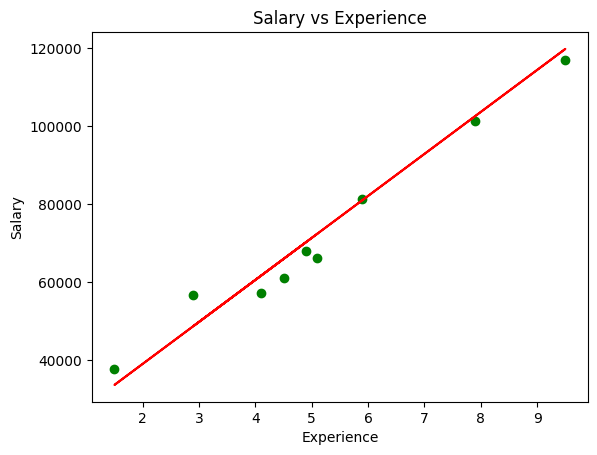

In [ ]:
plt.scatter(x_test,y_test, color='green')
plt.plot(x_test,test_prediction, color='red')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()